# PyGMRT

A minimal Python package for downloading bathymetry and topography tiles from the [Global Multi-Resolution Topography (GMRT) Synthesis](https://www.gmrt.org/).

[![Python](https://img.shields.io/badge/python-3.11+-blue.svg)](https://python.org)
[![License](https://img.shields.io/badge/license-MIT-green.svg)](LICENSE)

## Features

- **Simple API**: Single function to download GMRT tiles
- **Multiple resolutions**: High (1 arc-second), medium (4 arc-second), low (16 arc-second)
- **GeoTIFF format**: Direct integration with rasterio and other geospatial tools
- **Antimeridian support**: Handles bounding boxes that cross the 180° longitude
- **No API key required**: Direct access to GMRT GridServer

## Installation

### Using UV (recommended)

If you don't have UV installed, follow the instructions at [uv](https://uv.readthedocs.io/en/latest/). Then install PyGMRT from PyPI:

```bash
uv add pygmrt
```

Or install from source

```bash
git clone https://github.com/leonard-seydoux/pygmrt.git
cd pygmrt
uv sync
```


### Using pip

Similarly, you can either install from PyPI:

```bash
pip install pygmrt
```

Or install from source:

```bash
git clone https://github.com/leonard-seydoux/pygmrt.git
cd pygmrt
pip install -e .
```

## Quick start

The simplest way to download and visualize GMRT tiles is with a single function call. The package integrates seamlessly with `rasterio` for reading GeoTIFF files and `pycpt-city` for beautiful color palettes.

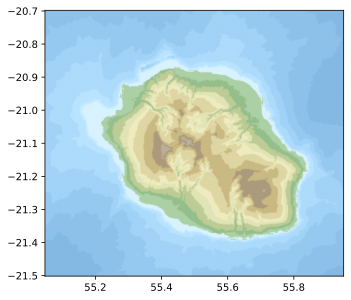

Text(3.1999999999999957, 0.5, 'Latitude')

In [1]:
%config InlineBackend.figure_format = 'svg'

from rasterio.plot import show
from pygmrt.tiles import download_tiles
import pycpt

# Get tiles for La Réunion Island [west, south, east, north]
tiles = download_tiles(bbox=[55.05, -21.5, 55.95, -20.7], resolution="low")
palette = pycpt.read("wiki-france")

# Show with minimal processing
ax = show(tiles, cmap=palette.cmap, norm=palette.norm)
ax.set_title("La Réunion Island")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

## Advanced visualization with hillshading

For more sophisticated visualizations, you can combine GMRT data with Matplotlib's hillshading capabilities and Cartopy for geographic projections.

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LightSource

import pycpt
from pygmrt.tiles import download_tiles

plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["font.size"] = 12
plt.rcParams["font.sans-serif"] = "Arial"

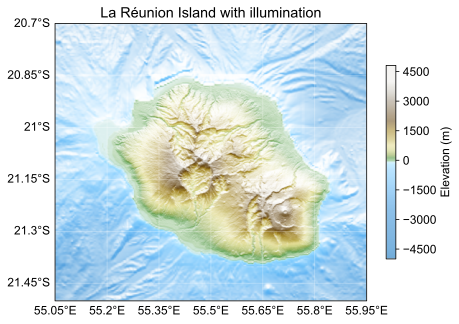

In [3]:
# La Réunion bbox [west, south, east, north]
bbox = [55.05, -21.5, 55.95, -20.7]

# Download
tiles = download_tiles(bbox=bbox, resolution="medium")

# Remove NaNs and smooth a bit for better visualization
topo = tiles.read(1)
topo[np.isnan(topo)] = 0
vmax = abs(topo).max()
bbox = tiles.bounds
extent = (bbox.left, bbox.right, bbox.bottom, bbox.top)
palette = pycpt.read("wiki-france")
palette.interpolate(256)

# Create figure
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Hillshade
sun = LightSource(azdeg=0, altdeg=20)
shade = sun.shade(topo, cmap=palette.cmap, norm=palette.norm, vert_exag=0.1)
ax.imshow(shade, extent=extent, origin="upper", transform=ccrs.PlateCarree())

# Extra map features
palette.colorbar(ax=ax, label="Elevation (m)", shrink=0.5)
ax.set_extent(extent)
gridlines = ax.gridlines(draw_labels=True, color="white", alpha=0.3)
gridlines.top_labels = False
gridlines.right_labels = False
ax.set_title("La Réunion Island with illumination")

plt.show()

## Example: Colombia relief

Here's another example showing the topography and bathymetry of Colombia, demonstrating the package's capability to handle larger areas with different color palettes.

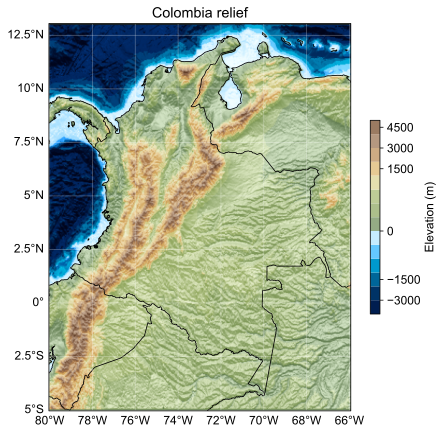

In [4]:
from cartopy import feature as cfeature

# Colombia bbox [west, south, east, north]
bbox = [-80.0, -5.0, -66.0, 13.0]

# Download
tiles = download_tiles(bbox=bbox, resolution="low")

# Remove NaNs and smooth a bit for better visualization
topo = tiles.read(1)
topo[np.isnan(topo)] = 0
vmax = abs(topo).max()
bbox = tiles.bounds
extent = (bbox.left, bbox.right, bbox.bottom, bbox.top)
palette = pycpt.read("colombia")

# Create figure
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Hillshade
sun = LightSource(azdeg=0, altdeg=60)
shade = sun.shade(
    topo,
    cmap=palette.cmap,
    norm=palette.norm,
    vert_exag=0.5,
    blend_mode="soft",
)
ax.imshow(shade, extent=extent, origin="upper", transform=ccrs.PlateCarree())

# Extra map features
palette.colorbar(ax=ax, label="Elevation (m)", shrink=0.5)
ax.set_extent(extent)
ax.coastlines(color="k", linewidth=0.8)
ax.add_feature(cfeature.BORDERS, edgecolor="k", linewidth=0.8)
gridlines = ax.gridlines(draw_labels=True, color="white", alpha=0.3)
gridlines.top_labels = False
gridlines.right_labels = False
ax.set_title("Colombia relief")

plt.show()

## API Reference

### `download_tiles(bbox, resolution='medium')`

Download GMRT tiles for a specified bounding box.

**Parameters:**
- `bbox` (list): Bounding box coordinates as `[west, south, east, north]` in decimal degrees
- `resolution` (str): Resolution level - `'high'` (1 arc-second), `'medium'` (4 arc-second), or `'low'` (16 arc-second)

**Returns:**
- `rasterio.DatasetReader`: GeoTIFF dataset that can be used with rasterio functions

**Example:**
```python
from pygmrt.tiles import download_tiles

# Download tiles for a region
tiles = download_tiles(bbox=[-10, 35, 0, 45], resolution="medium")

# Read the data
elevation = tiles.read(1)
```

## Contributing

Contributions are welcome! Please feel free to submit a Pull Request.

## License

This project is licensed under the MIT License - see the LICENSE file for details.

## Acknowledgments

- GMRT data is provided by the [Global Multi-Resolution Topography Synthesis](https://www.gmrt.org/)
- Color palettes from [cpt-city](http://seaviewsensing.com/pub/cpt-city/) via [pycpt-city](https://github.com/leonard-seydoux/pycpt-city)

---

*This README was generated from `readme.ipynb`. To regenerate, run:*
```bash
python build_readme.py
```